In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fc
import importlib

importlib.reload(fc)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_59248\2591684422.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<module 'functions' from 'c:\\Users\\Sabrina\\Desktop\\TestDA\\Week_9\\Final_project\\notebooks\\functions.py'>

In [2]:
cleaned_video_games = pd.read_csv('..\data\cleaned\cleaned_video_games_df.csv')
cleaned_video_games = cleaned_video_games.drop(columns='Unnamed: 0', axis=1)
cleaned_video_games

,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


## Global sales predictions

In [3]:
global_df = cleaned_video_games[['global', 'japan']].copy()
global_df

,global,japan
0,81.12,3.77
1,40.24,6.81
2,33.55,3.63
3,31.52,3.18
4,30.26,4.22
...,...,...
1902,0.83,0.00
1903,0.83,0.16
1904,0.83,0.00
1905,0.83,0.28


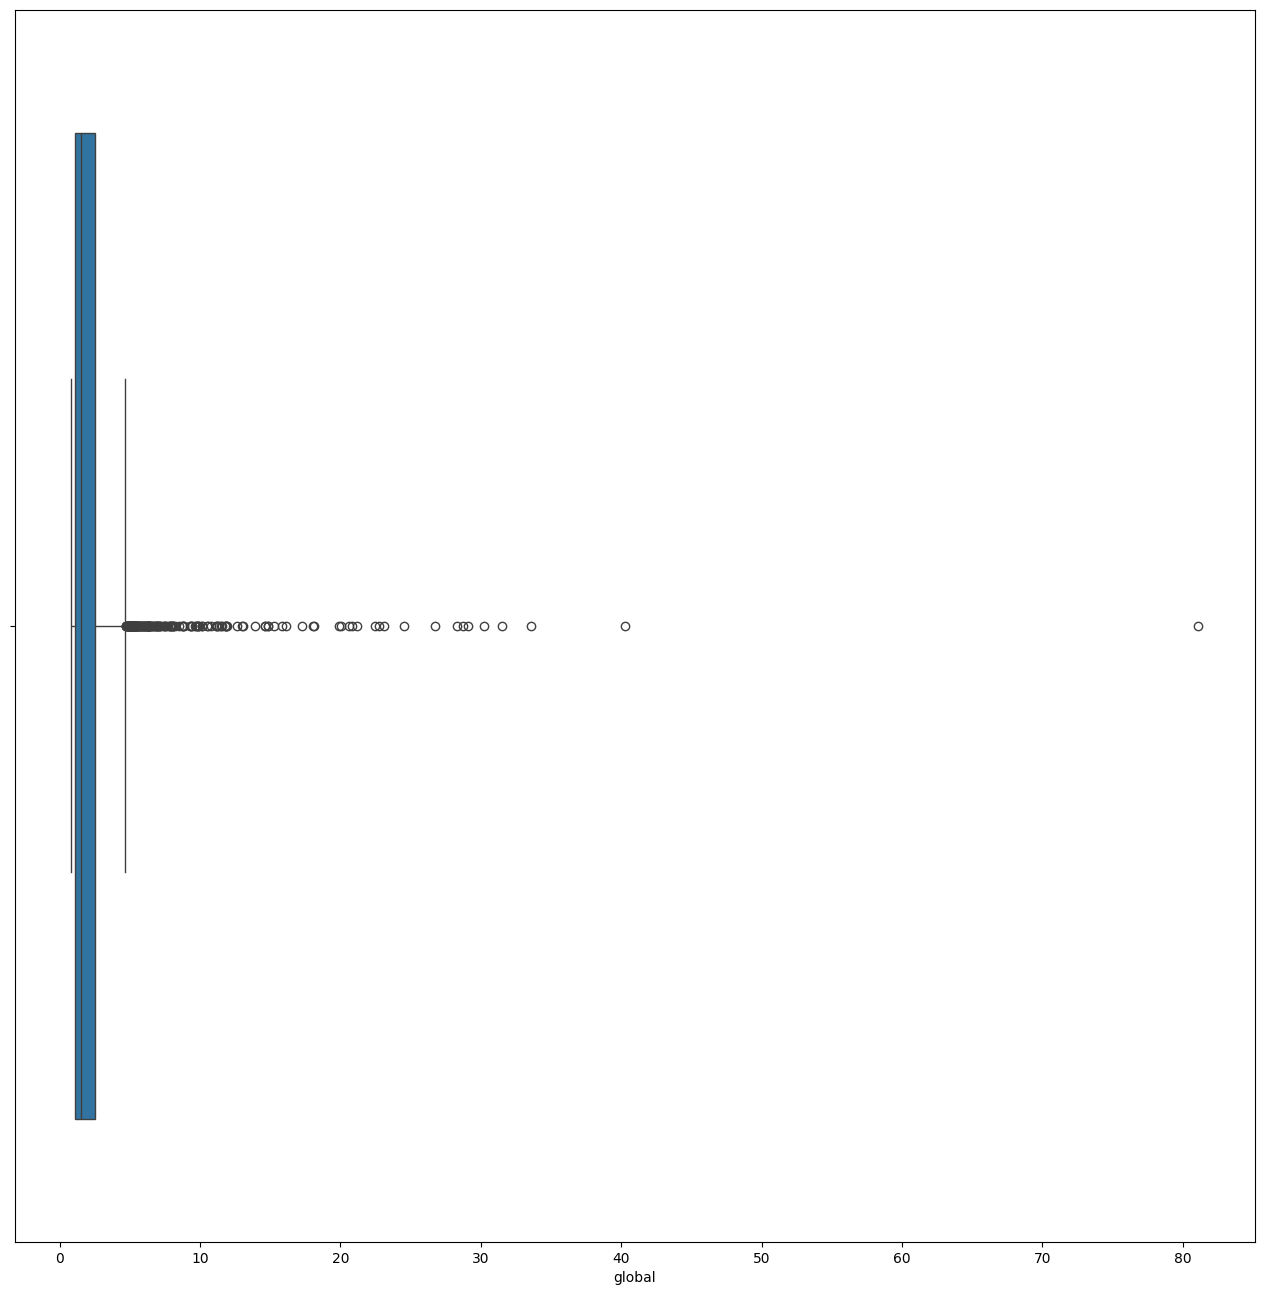

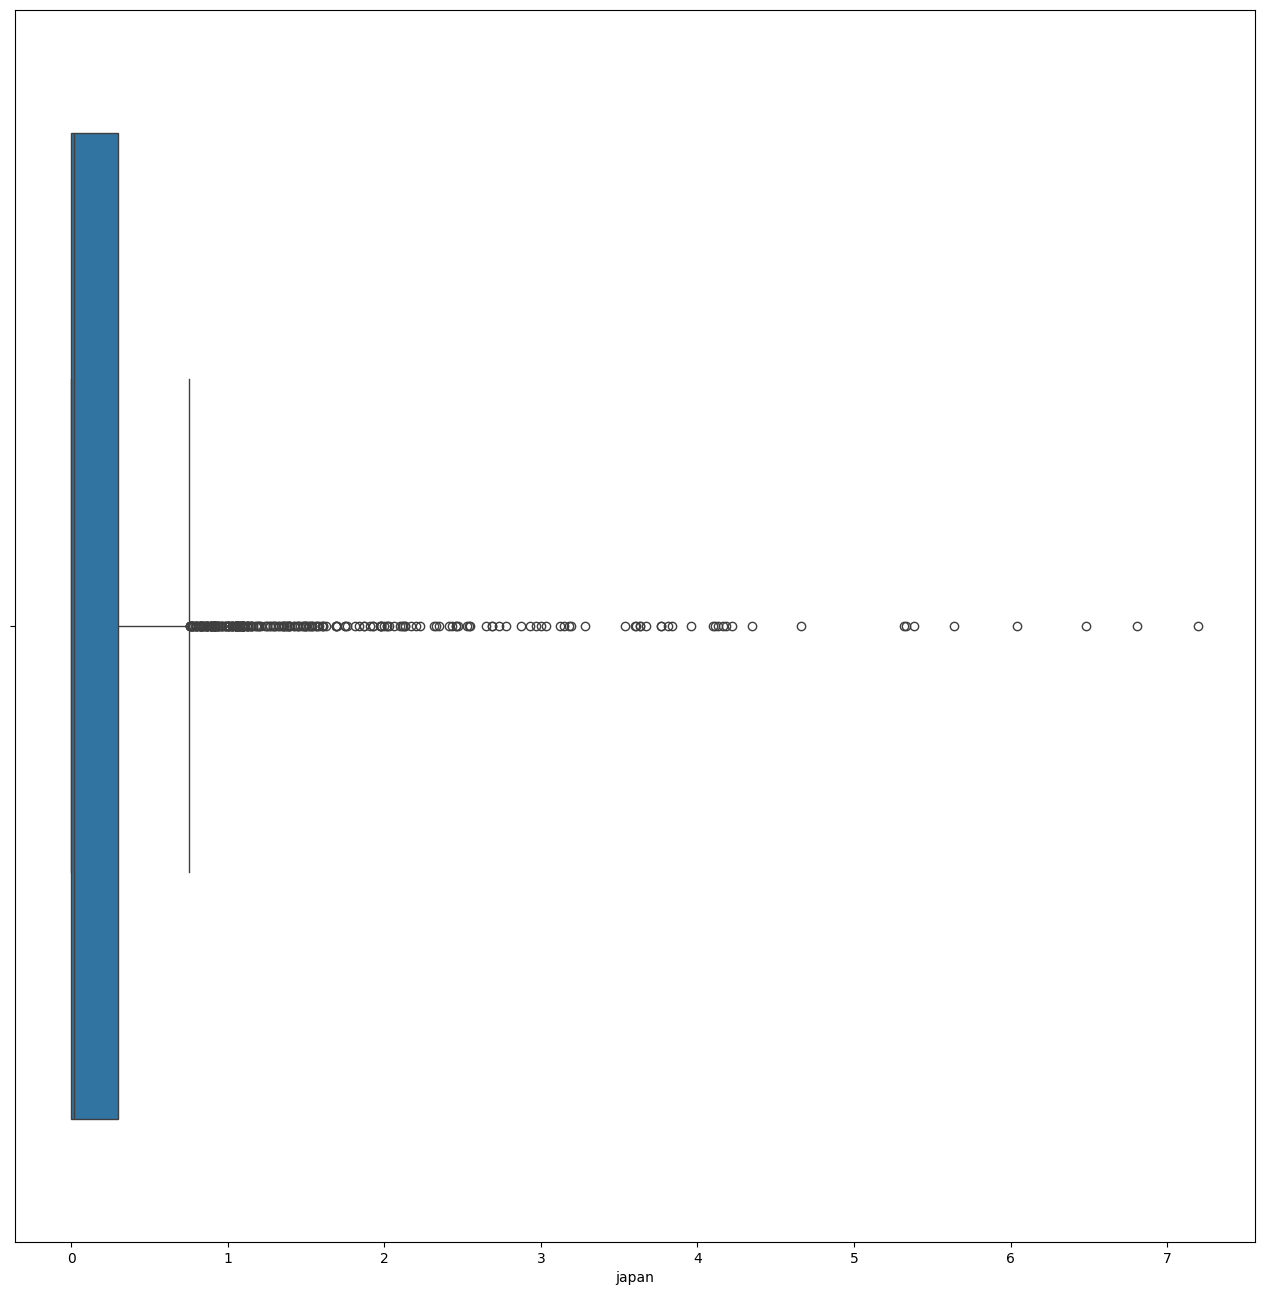

In [4]:
def boxplot_continuous_variables(df: pd.DataFrame, figsize_height: int=16, figsize_width: int=16):
    """This functions takes as:
    Input: a df with continuous variables, and figsizes with a default value each of 16
    Output: boxplots for each column of the df to check for outliers"""
    for col in df:
        fig, ax = plt.subplots(figsize=(figsize_height,figsize_width))
        sns.boxplot(data=df, x=col)
        plt.show()
boxplot_continuous_variables(global_df)

In [5]:
from scipy.stats import zscore

score = zscore(cleaned_video_games['global'])
print(score)

0       22.073496
1       10.597522
2        8.719483
3        8.149614
4        7.795903
          ...    
1902    -0.465787
1903    -0.465787
1904    -0.465787
1905    -0.465787
1906    -0.465787
Name: global, Length: 1907, dtype: float64


In [6]:
cleaned_video_games.describe().round(2)

,year,north_america,europe,japan,rest_of_world,global,review
count,1907.00,1907.00,1907.00,1907.00,1907.00,1907.00,1907.00
mean,2003.76,1.26,0.71,0.32,0.21,2.49,79.04
std,5.91,1.96,1.15,0.72,0.34,3.56,10.62
min,1975.00,0.00,0.00,0.00,0.00,0.83,30.50
25%,2000.50,0.51,0.23,0.00,0.06,1.11,74.00
50%,2005.00,0.81,0.44,0.02,0.13,1.53,81.00
75%,2008.00,1.38,0.81,0.30,0.22,2.54,86.23
max,2012.00,40.43,28.39,7.20,8.54,81.12,97.00


In [7]:
threshold = 3

outliers = (np.abs(score) > threshold)
outliers = pd.DataFrame(outliers)
copy_df = cleaned_video_games.copy()
#copy_df = outliers(outliers['global'] == True).replace(outliers, np.mean(outliers['global']))
copy_df

,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [8]:
condition = outliers['global'] == False
#copy_df['global'].where(condition, other=40.00, inplace=True) 
#copy_df['global'] = outliers['global'].where(outliers['global'] == True, cleaned_video_games['global'])
cleaned_video_games['global'].where(condition, other=15.00, inplace=True) 
display(cleaned_video_games)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_59248\1901930851.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_video_games['global'].where(condition, other=15.00, inplace=True)


,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,15.00,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,15.00,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,15.00,82.07
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,15.00,82.65
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,15.00,88.00
...,...,...,...,...,...,...,...,...,...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [9]:
y = cleaned_video_games['global']
#dropping game_title and review as we want predictions to be done by a new game which would have a new title and no reviews. Also dropping global as it's our y variable. 
X = cleaned_video_games[['platform', 'genre', 'publisher']]
display(y.head(3))
display(X.head(3))

0    15.0
1    15.0
2    15.0
Name: global, dtype: float64

,platform,genre,publisher
0,Wii,Sports,Nintendo
1,NES,Platform,Nintendo
2,Wii,Racing,Nintendo


In [10]:
X['publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'THQ', 'Disney Interactive Studios',
       'Acclaim Entertainment', 'Level 5', 'MTV Games', 'Codemasters',
       'id Software', 'Havas Interactive', 'Majesco Entertainment',
       'Midway Games', 'Hudson Soft', 'JVC', 'Valve Software',
       '989 Studios', 'Maxis', 'Square EA', 'Tecmo Koei', 'Gotham Games',
       'Deep Silver', 'Infogrames', 'Arena Entertainment', 'Mindscape',
       'Banpresto', 'NCSoft', 'Crave Entertainment

In [11]:
print(len(X['platform'].value_counts()))
print(len(X['genre'].value_counts()))
print(len(X['publisher'].value_counts()))

22
12
93


In [12]:
#for col in X:
#    if len(X[col].unique()) >= 6:
#        fig, ax = plt.subplots(figsize=(16, 16))
#        sns.countplot(data=X, y=col, order=X[col].value_counts().index, ax=ax)
#        ax.set_title(f'Countplot for {col}')
#    else:
#        fig, ax = plt.subplots(figsize=(16, 16))
#        sns.countplot(data=X, x=col, order=X[col].value_counts().index, ax=ax)
#        ax.set_title(f'Countplot for {col}')

#    plt.show()

In [13]:
#to reduce platform cardinality

#platform_sony = X['platform'].isin(['PS2', 'PS', 'PS3', 'PSP', 'PSV'])
#X.loc[platform_sony, 'platform'] = 'Sony console'
#X.loc[X['platform'] == 'PSV', 'platform'] = 'PS'

#platform_nintendo = X['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', '3DS', 'Wii','WiiU'])
#X.loc[platform_nintendo, 'platform'] = 'Nintendo console'
#X.loc[X['platform'] == 'WiiU', 'platform'] = 'Wii'

#platform_sega = X['platform'].isin(['GEN', 'SCD', 'SAT', 'DC'])
#X.loc[platform_sega, 'platform'] = 'Sega console'

#platform_microsoft = X['platform'].isin(['XB', 'X360'])
#X.loc[platform_microsoft, 'platform'] = 'Microsoft console'

X['platform'].value_counts()

platform
PS2     372
PS      223
X360    219
PS3     202
Wii     161
DS      149
GBA      75
XB       72
PC       71
PSP      63
NES      60
N64      57
GC       55
GB       48
SNES     41
3DS      15
GEN      11
DC        6
SAT       3
WiiU      2
SCD       1
PSV       1
Name: count, dtype: int64

In [14]:
# to reduce publisher cardinality and avoid too much data loss, I will be only applying changes to the Indies publishers of this dataset. I wil also be dropping those rows with less than 4 value counts.

#small_publisher = X['publisher'].isin([
#    'Red Orb', '505 Games', 'GT Interactive', 'Virgin Interactive', 'Universal Interactive',
#    'Eidos Interactive', 'RedOctane', 'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
#    'Hasbro Interactive', 'Acclaim Entertainment', 'Level 5', 'MTV Games', 'Codemasters', 'id Software',
#    'Majesco Entertainment', 'Hudson Soft', 'JVC', 'Valve Software', '989 Studios', 'Maxis', 'Square EA',
#    'Tecmo Koei', 'Gotham Games', 'Deep Silver', 'Infogrames', 'Arena Entertainment', 'Mindscape', 'Banpresto',
#    'NCSoft', 'Crave Entertainment', 'D3Publisher', 'Red Storm Entertainment', 'Video System', 'Global Star',
#    'Westwood Studios', 'Fox Interactive', 'Valve', 'TDK Mediactive', 'ASC Games', 'Rising Star Games', 'Accolade',
#    'Sony Online Entertainment', '3DO', 'Natsume', 'Pacific Century Cyber Works', 'GameBank', 'RTL', 'Black Label Games',
#    'SouthPeak Games', 'Ocean', 'Psygnosis', 'Empire Interactive', 'Success', 'Russel', 'Agetec', 'Microprose',
#    'Play It', 'City Interactive', 'Sammy Corporation', 'Tomy Corporation', 'GSP', 'Koch Media', 'Titus',
#    'ASCII Entertainment', 'CTO SpA', 'TalonSoft', 'Crystal Dynamics', 'SCi', 'Rage Software', 'Mastertronic', 'Pinnacle'
#    ])
#X.loc[small_publisher, 'publisher'] = 'small publisher'

#large_publisher = X['publisher'].isin([ 'Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Activision',
#    'Electronic Arts', 'Ubisoft', 'Square Enix', 'Bethesda Softworks', 'Capcom', 'Konami Digital Entertainment',
#    'THQ', 'Sega', 'Namco Bandai Games', 'Warner Bros. Interactive Entertainment', 'Square', 'Disney Interactive Studios',
#    'Havas Interactive', 'Midway Games'
#])
#X.loc[large_publisher, 'publisher'] = 'large publisher'

X['publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'THQ', 'Disney Interactive Studios',
       'Acclaim Entertainment', 'Level 5', 'MTV Games', 'Codemasters',
       'id Software', 'Havas Interactive', 'Majesco Entertainment',
       'Midway Games', 'Hudson Soft', 'JVC', 'Valve Software',
       '989 Studios', 'Maxis', 'Square EA', 'Tecmo Koei', 'Gotham Games',
       'Deep Silver', 'Infogrames', 'Arena Entertainment', 'Mindscape',
       'Banpresto', 'NCSoft', 'Crave Entertainment

In [15]:
#index_to_drop = []

#for publisher, count in X['publisher'].value_counts().items():
#    if count < 4:
#        indices = X[X['publisher'] == publisher].index
#        index_to_drop.extend(indices)

# Dropping rows from X_cat and X_num
#X = X.drop(index_to_drop)
#X

In [16]:
print(len(X['platform'].value_counts()))
print(len(X['genre'].value_counts()))
print(len(X['publisher'].value_counts()))

22
12
93


In [17]:
#y.drop(index_to_drop, inplace=True)
#y

In [18]:
#cleaned_video_games.drop(index_to_drop, inplace=True)

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

encoder.fit(X)
X_encoded = encoder.transform(X).toarray()

In [20]:
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(), index=X.index)
X = X_encoded_df

In [21]:
y = pd.DataFrame(y)

In [22]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform')

y = qt.fit_transform(y)

y = pd.DataFrame(y)
y.skew().round(3)
y

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1902,0.0
1903,0.0
1904,0.0
1905,0.0


In [23]:
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='box-cox')
#y = pt.fit_transform(y)

#y = pd.DataFrame(y)
#y.skew().round()


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Prediction model with Random Forest

In [25]:
y_train = np.ravel(y_train)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False], 
    'random_state': [42],  
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, n_jobs=1, verbose=20)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42
[CV 1/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42
[CV 2/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42
[CV 3/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

c:\Users\Sabrina\Desktop\TestDA\Week_9\Final_project\final_project\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sabrina\Desktop\TestDA\Week_9\Final_project\final_project\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sabrina\Desktop\TestDA\Week_9\Final_project\final_project\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Sabrina\Desktop\TestDA\Week_9\Final_p

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42}

In [27]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [28]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

cross_val_score = cross_val_score(rf, X_train, y_train, cv=10)
print("The mean R2 of over the folds was {:.2f}".format(np.mean(cross_val_score)))

The mean R2 of over the folds was 0.12


In [29]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse.round(3)}')

mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae.round(3)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Root Mean Squared Error: {rmse.round(3)}')

r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2.round(3)}')

Mean Squared Error: 0.075
Mean Absolute Error: 0.232
Root Mean Squared Error: 0.273
R-squared: 0.123


In [31]:
error_df = cleaned_video_games[['global']].copy()
error_df.columns = ["y_real"]

error_df["y_pred"] = rf.predict(X)

error_df["error"] = error_df['y_real'] - error_df['y_pred']
error_df

,y_real,y_pred,error
0,15.00,0.692036,14.307964
1,15.00,0.651329,14.348671
2,15.00,0.743400,14.256600
3,15.00,0.692036,14.307964
4,15.00,0.680767,14.319233
...,...,...,...
1902,0.83,0.461787,0.368213
1903,0.83,0.706844,0.123156
1904,0.83,0.386160,0.443840
1905,0.83,0.476014,0.353986


In [32]:
print(len(error_df[error_df['error'] > 10.00]))
print(len(error_df[(error_df['error'] < 10.00) & (error_df['error'] > 0.00)]))
print(len(error_df[error_df['error'] < 0.00]))

44
1863
0


## Predictive Model with Gradient Boosting Regressor

In [33]:
#y_train = np.ravel(y_train)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_depth': [3,5],
}

gb = GradientBoostingRegressor(random_state=100)

grid_search = GridSearchCV(gb, param_grid, cv=5, return_train_score=True, n_jobs=1, verbose=20)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10
[CV 1/5; 1/40] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.110, test=0.099) total time=   0.0s
[CV 2/5; 1/40] START max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10
[CV 2/5; 1/40] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.132, test=0.025) total time=   0.0s
[CV 3/5; 1/40] START max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10
[CV 3/5; 1/40] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.117, test=0.065) total time=   0.0s
[CV 4/5; 1/40] START max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10
[CV 4/5; 1/40] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=(train=0.106, test=0.110) total time=   0.0

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [35]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=50,
                          random_state=100)

In [36]:
from sklearn.model_selection import cross_val_score

gb = GradientBoostingRegressor(max_depth=5, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=50,
                          random_state=100)

cross_val_score = cross_val_score(gb, X_train, y_train, cv=10)
print("The mean R2 of over the folds was {:.2f}".format(np.mean(cross_val_score)))

The mean R2 of over the folds was 0.11


In [37]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse.round(3)}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae.round(3)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse.round(3)}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2.round(3)}')

Mean Squared Error: 0.077
Mean Absolute Error: 0.236
Root Mean Squared Error: 0.277
R-squared: 0.096


In [39]:
error_df = cleaned_video_games[['global']].copy()
error_df.columns = ["y_real"]

error_df["y_pred"] = gb.predict(X)

error_df["error"] = error_df['y_real'] - error_df['y_pred']
error_df

,y_real,y_pred,error
0,15.00,0.791402,14.208598
1,15.00,0.706463,14.293537
2,15.00,0.806713,14.193287
3,15.00,0.791402,14.208598
4,15.00,0.656151,14.343849
...,...,...,...
1902,0.83,0.470231,0.359769
1903,0.83,0.808442,0.021558
1904,0.83,0.476708,0.353292
1905,0.83,0.480654,0.349346


In [40]:
print(len(error_df[error_df['error'] > 10.00]))
print(len(error_df[(error_df['error'] < 10.00) & (error_df['error'] > 0.00)]))
print(len(error_df[error_df['error'] < 0.00]))

44
1863
0


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2']  
}

dt = DecisionTreeRegressor(random_state=100)

grid_search = GridSearchCV(dt, param_grid, cv=5, return_train_score=True, n_jobs=1, verbose=20)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5; 1/864] START criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/864] END criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.673, test=-0.291) total time=   0.0s
[CV 2/5; 1/864] START criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 1/864] END criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.635, test=-0.153) total time=   0.0s
[CV 3/5; 1/864] START criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 1/864] END criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.6

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [42]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=4,
                      random_state=100)

In [43]:
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=4,
                      random_state=100)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse.round(3)}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae.round(3)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse.round(3)}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2.round(3)}')

Mean Squared Error: 0.081
Mean Absolute Error: 0.242
Root Mean Squared Error: 0.285
R-squared: 0.049


In [45]:
error_df = cleaned_video_games[['global']].copy()
error_df.columns = ["y_real"]

error_df["y_pred"] = dt.predict(X)

error_df["error"] = (error_df['y_real'] - error_df['y_pred']).round(2)
error_df

,y_real,y_pred,error
0,15.00,0.841895,14.16
1,15.00,0.703200,14.30
2,15.00,0.841895,14.16
3,15.00,0.841895,14.16
4,15.00,0.703200,14.30
...,...,...,...
1902,0.83,0.447891,0.38
1903,0.83,0.841895,-0.01
1904,0.83,0.447891,0.38
1905,0.83,0.520063,0.31


In [46]:
print(len(error_df[error_df['error'] > 10.00]))
print(len(error_df[(error_df['error'] < 10.00) & (error_df['error'] > 0.00)]))
print(len(error_df[error_df['error'] < 0.00]))

44
1862
1


## Saving Random Forest Model, encoder, transformer

In [47]:
import pickle
import os

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "QuantileTransformer.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(qt, file) 

In [48]:
path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "OneHotEncoder.pkl" 
with open(path+filename, "wb") as file:
   pickle.dump(encoder, file) 

In [49]:
path = "models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "RandomForestRegressor.pkl" 
with open(path+filename, "wb") as file:
   pickle.dump(rf, file) 

The new directory is created!
